# Since we don't have access to real-world drug sales data due to privacy and legal restrictions, we'll generate synthetic data for this project.
- This code generates a DataFrame with sales data for 3 drugs for each day of the year 2022. The sales data is randomly generated and ranges from 50 to 200 for Drug A, 20 to 100 for Drug B, and 10 to 50 for Drug C.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV


# Set a seed for reproducibility
np.random.seed(0)

# Generate dates for one year
dates = pd.date_range(start='2022-01-01', end='2022-12-31')

# Generate random sales data for 3 drugs
drug_A_sales = np.random.randint(50, 200, size=len(dates))
drug_B_sales = np.random.randint(20, 100, size=len(dates))
drug_C_sales = np.random.randint(10, 50, size=len(dates))

# Create a DataFrame
data = pd.DataFrame({
    'date': dates,
    'drug_A_sales': drug_A_sales,
    'drug_B_sales': drug_B_sales,
    'drug_C_sales': drug_C_sales
})

# Set the date as the index
data.set_index('date', inplace=True)

print(data.head())


            drug_A_sales  drug_B_sales  drug_C_sales
date                                                
2022-01-01            97            62            23
2022-01-02           167            85            47
2022-01-03           117            40            29
2022-01-04           153            56            18
2022-01-05            59            88            42


# We'll use Python's matplotlib and seaborn libraries for this. Here's how you can visualize the sales data for the three drugs. 
- This code creates three line plots, one for each drug, showing the sales over time. This will help us understand the trends and patterns in the sales data.



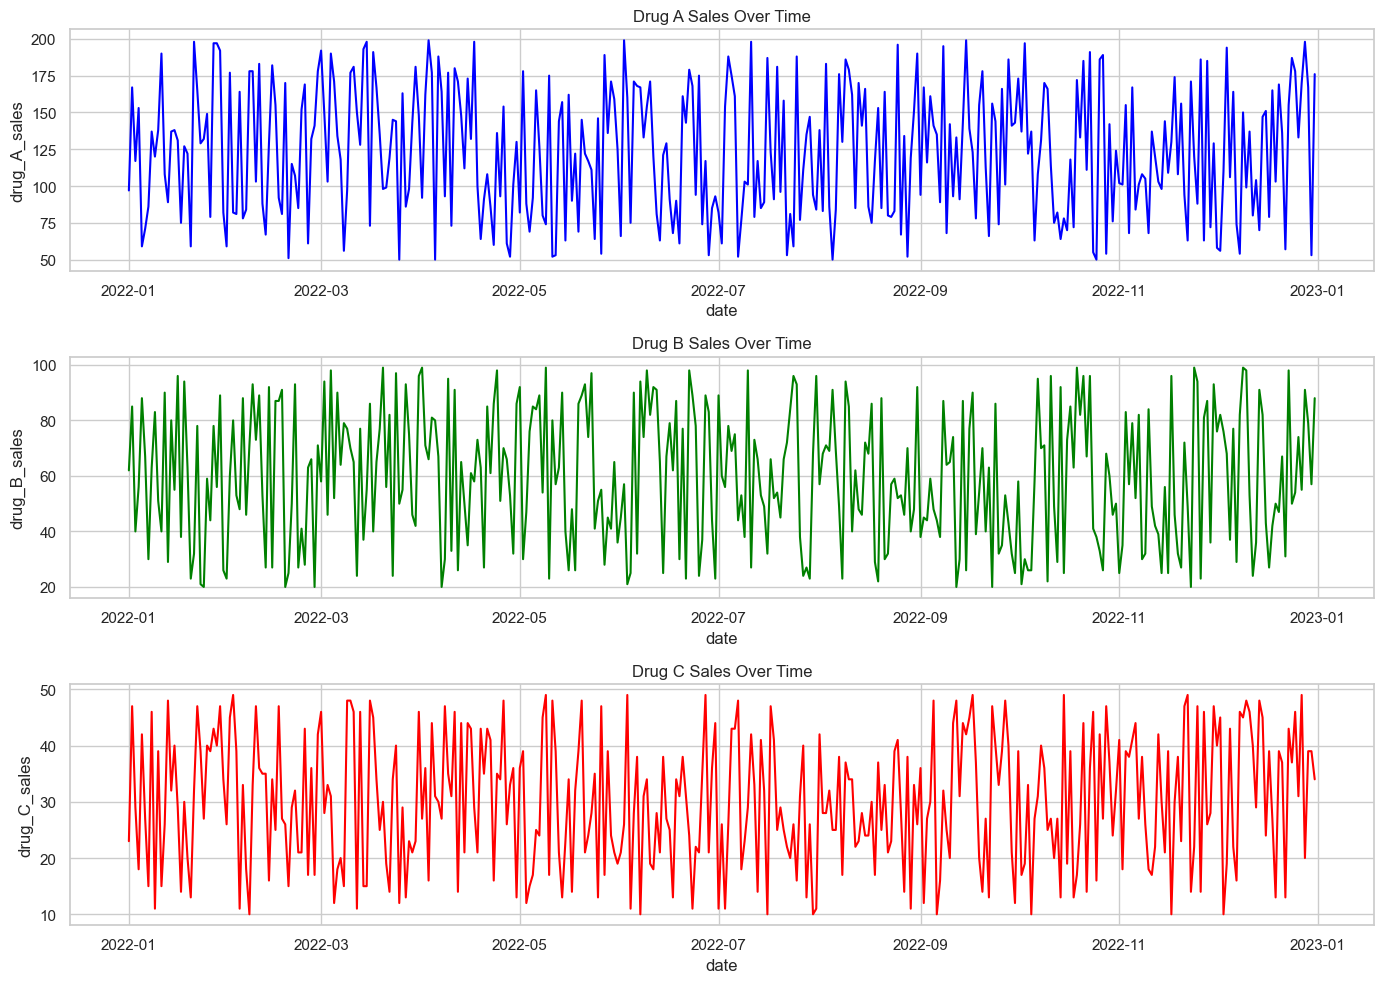

In [3]:
# Set the style of the plots
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 10))

# Plot the sales data for each drug
sns.lineplot(data=data, x=data.index, y='drug_A_sales', ax=axes[0], color='blue').set_title('Drug A Sales Over Time')
sns.lineplot(data=data, x=data.index, y='drug_B_sales', ax=axes[1], color='green').set_title('Drug B Sales Over Time')
sns.lineplot(data=data, x=data.index, y='drug_C_sales', ax=axes[2], color='red').set_title('Drug C Sales Over Time')

# Automatically adjust subplot params so that the subplot fits into the figure area
fig.tight_layout()

# Display the figure
plt.show()


# Moving on to feature engineering.
- In time series forecasting, date and time features often provide valuable information. Here's how you can create some new features from the date:
  - This code creates four new features:

        - day_of_week: The day of the week, where Monday is 0 and Sunday is 6.
        - month: The month of the year, from 1 (January) to 12 (December).
        - day_of_month: The day of the month.
        - day_of_year: The day of the year, from 1 to 365 (or 366 in leap years).

- These features might help our model capture weekly, monthly, and yearly patterns in the sales data.

In [4]:
# Create new features from the date
data['day_of_week'] = data.index.dayofweek
data['month'] = data.index.month
data['day_of_month'] = data.index.day
data['day_of_year'] = data.index.dayofyear

print(data.head())

            drug_A_sales  drug_B_sales  drug_C_sales  day_of_week  month  \
date                                                                       
2022-01-01            97            62            23            5      1   
2022-01-02           167            85            47            6      1   
2022-01-03           117            40            29            0      1   
2022-01-04           153            56            18            1      1   
2022-01-05            59            88            42            2      1   

            day_of_month  day_of_year  
date                                   
2022-01-01             1            1  
2022-01-02             2            2  
2022-01-03             3            3  
2022-01-04             4            4  
2022-01-05             5            5  


# We'll use the sklearn library's train_test_split function to split our data into a training set and a test set.
  - This code separates the features (the date features) and the targets (the sales data for each drug), and then splits each set of features and targets into a training set (80% of the data) and a test set (20% of the data).

In [5]:
# Separate the features and the target
X = data.drop(['drug_A_sales', 'drug_B_sales', 'drug_C_sales'], axis=1)
y_A = data['drug_A_sales']
y_B = data['drug_B_sales']
y_C = data['drug_C_sales']

# Split the data into a training set and a test set for each drug
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X, y_A, test_size=0.2, random_state=0)
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X, y_B, test_size=0.2, random_state=0)
X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(X, y_C, test_size=0.2, random_state=0)


# We'll use the RandomForestRegressor model from the sklearn library.
 - This code creates a Random Forest Regressor for each drug and trains it on the corresponding training data. The n_estimators parameter specifies the number of trees in the forest, and the random_state parameter is used for reproducibility.

In [6]:
# Create a Random Forest Regressor for each drug
model_A = RandomForestRegressor(n_estimators=100, random_state=0)
model_B = RandomForestRegressor(n_estimators=100, random_state=0)
model_C = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the models
model_A.fit(X_train_A, y_train_A)
model_B.fit(X_train_B, y_train_B)
model_C.fit(X_train_C, y_train_C)


RandomForestRegressor(random_state=0)

# Model Evaluation. We'll use the mean absolute error (MAE) metric from the sklearn library to evaluate the performance of our models.
- This code makes predictions on the test data using our trained models and calculates the mean absolute error of these predictions. The mean absolute error is the average of the absolute differences between the predicted and actual values. It gives us an idea of how well our models are performing.

In [7]:
# Make predictions on the test data
predictions_A = model_A.predict(X_test_A)
predictions_B = model_B.predict(X_test_B)
predictions_C = model_C.predict(X_test_C)

# Calculate the mean absolute error of the predictions
mae_A = mean_absolute_error(y_test_A, predictions_A)
mae_B = mean_absolute_error(y_test_B, predictions_B)
mae_C = mean_absolute_error(y_test_C, predictions_C)

print(f'Mean Absolute Error for Drug A: {mae_A:.2f}')
print(f'Mean Absolute Error for Drug B: {mae_B:.2f}')
print(f'Mean Absolute Error for Drug C: {mae_C:.2f}')


Mean Absolute Error for Drug A: 39.17
Mean Absolute Error for Drug B: 21.73
Mean Absolute Error for Drug C: 10.35


# We can use the Mean Absolute Percentage Error (MAPE) as a metric for evaluation. MAPE expresses the absolute difference between the actual and predicted values as a percentage, which can be more intuitive to understand.
- However, please note that sklearn doesn't provide a built-in function for MAPE, but we can easily define it ourselves. This code calculates the MAPE for each drug and prints the results. The MAPE gives us an idea of the average error of our models as a percentage of the actual values.

In [8]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate the MAPE of the predictions
mape_A = mean_absolute_percentage_error(y_test_A, predictions_A)
mape_B = mean_absolute_percentage_error(y_test_B, predictions_B)
mape_C = mean_absolute_percentage_error(y_test_C, predictions_C)

print(f'Mean Absolute Percentage Error for Drug A: {mape_A:.2f}%')
print(f'Mean Absolute Percentage Error for Drug B: {mape_B:.2f}%')
print(f'Mean Absolute Percentage Error for Drug C: {mape_C:.2f}%')


Mean Absolute Percentage Error for Drug A: 33.65%
Mean Absolute Percentage Error for Drug B: 45.70%
Mean Absolute Percentage Error for Drug C: 48.05%


In [9]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
grid_search_A = GridSearchCV(model_A, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search_B = GridSearchCV(model_B, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search_C = GridSearchCV(model_C, param_grid, cv=5, scoring='neg_mean_absolute_error')

# Perform a grid search
grid_search_A.fit(X_train_A, y_train_A)
grid_search_B.fit(X_train_B, y_train_B)
grid_search_C.fit(X_train_C, y_train_C)

# Print the best parameters
print(f'Best parameters for Drug A: {grid_search_A.best_params_}')
print(f'Best parameters for Drug B: {grid_search_B.best_params_}')
print(f'Best parameters for Drug C: {grid_search_C.best_params_}')


Best parameters for Drug A: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Best parameters for Drug B: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Best parameters for Drug C: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


In [10]:
# Get the best models from the grid search
best_model_A = grid_search_A.best_estimator_
best_model_B = grid_search_B.best_estimator_
best_model_C = grid_search_C.best_estimator_

# Make predictions on the test data
predictions_A = best_model_A.predict(X_test_A)
predictions_B = best_model_B.predict(X_test_B)
predictions_C = best_model_C.predict(X_test_C)

# Calculate the MAPE of the predictions
mape_A = mean_absolute_percentage_error(y_test_A, predictions_A)
mape_B = mean_absolute_percentage_error(y_test_B, predictions_B)
mape_C = mean_absolute_percentage_error(y_test_C, predictions_C)

print(f'Mean Absolute Percentage Error for Drug A: {mape_A:.2f}%')
print(f'Mean Absolute Percentage Error for Drug B: {mape_B:.2f}%')
print(f'Mean Absolute Percentage Error for Drug C: {mape_C:.2f}%')


Mean Absolute Percentage Error for Drug A: 33.49%
Mean Absolute Percentage Error for Drug B: 44.69%
Mean Absolute Percentage Error for Drug C: 46.58%


# Model Deployment. 
- Create a function that takes in the features of a new data point and returns the predicted sales for each drug.
  - This function creates a DataFrame from the input features, makes predictions using our trained models, and returns the predicted sales for each drug.

In [11]:
def predict_drug_sales(day_of_week, month, day_of_month, day_of_year):
    # Create a DataFrame from the input features
    features = pd.DataFrame({
        'day_of_week': [day_of_week],
        'month': [month],
        'day_of_month': [day_of_month],
        'day_of_year': [day_of_year]
    })

    # Make predictions
    predictions_A = best_model_A.predict(features)
    predictions_B = best_model_B.predict(features)
    predictions_C = best_model_C.predict(features)
    
    # Return the predictions
    return predictions_A[0], predictions_B[0], predictions_C[0]


# You can now use this function to make predictions on new data. For example, to predict the sales for the 7th day of the week, the 5th month, the 15th day of the month, and the 135th day of the year, you would call the function like this:

In [12]:
predict_drug_sales(7, 5, 15, 135)

(98.50019834634946, 55.26389514645867, 25.674444086571683)

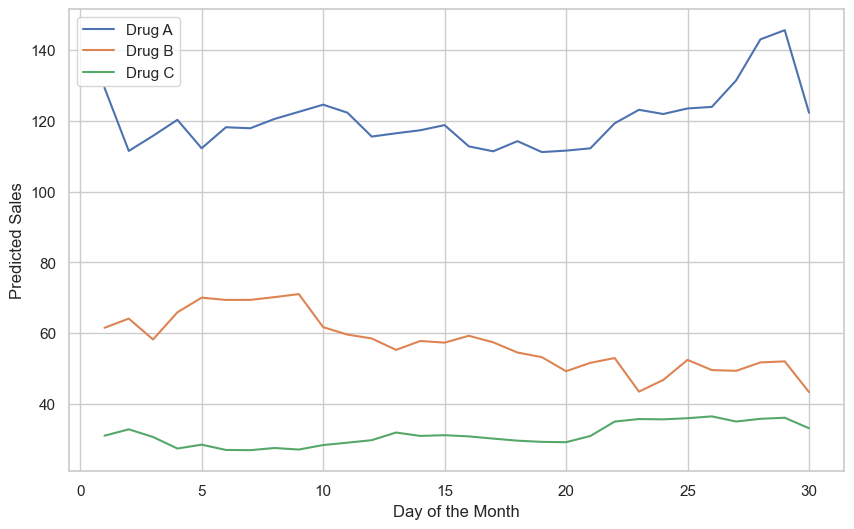

In [13]:
import numpy as np

# Define the days of the month
days = np.arange(1, 31)

# Initialize lists to store the predictions
predictions_A, predictions_B, predictions_C = [], [], []

# Make predictions for each day of the month
for day in days:
    prediction_A, prediction_B, prediction_C = predict_drug_sales(day, 1, day, day)
    predictions_A.append(prediction_A)
    predictions_B.append(prediction_B)
    predictions_C.append(prediction_C)

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the predictions for each drug
plt.plot(days, predictions_A, label='Drug A')
plt.plot(days, predictions_B, label='Drug B')
plt.plot(days, predictions_C, label='Drug C')

# Add labels and a legend
plt.xlabel('Day of the Month')
plt.ylabel('Predicted Sales')
plt.legend()

# Display the plot
plt.show()


This concludes the model deployment step. 